In [2]:
import pandas as pd
import os
import sys
import torch
import matplotlib.pyplot as plt 
import seaborn as sb
from tqdm import tqdm

path_to_dataset = "./dataset/"
path_to_train = os.path.join(path_to_dataset, "train.csv")
path_to_test = os.path.join(path_to_dataset, "test.csv")

In [3]:
train_df = pd.read_csv(path_to_train)

In [4]:
train_df.head(10)

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
5,28b57f3990,http://www.dothebouncy.com/smf - some shameles...,http://www.dothebouncy.com/smf - some shameles...,neutral
6,6e0c6d75b1,2am feedings for the baby are fun when he is a...,fun,positive
7,50e14c0bb8,Soooo high,Soooo high,neutral
8,e050245fbd,Both of you,Both of you,neutral
9,fc2cbefa9d,Journey!? Wow... u just became cooler. hehe....,Wow... u just became cooler.,positive


In [5]:
print(train_df.sentiment.value_counts().index)

Index(['neutral', 'positive', 'negative'], dtype='object')


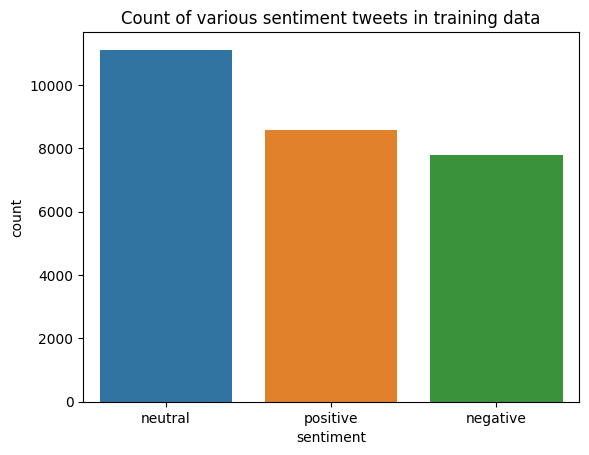

In [6]:


sb.countplot(x='sentiment',data=train_df, order=train_df.sentiment.value_counts().index)\
.set_title('Count of various sentiment tweets in training data');


Text(0.5, 1.0, 'Distribution of text_length (no. of words) in training data')

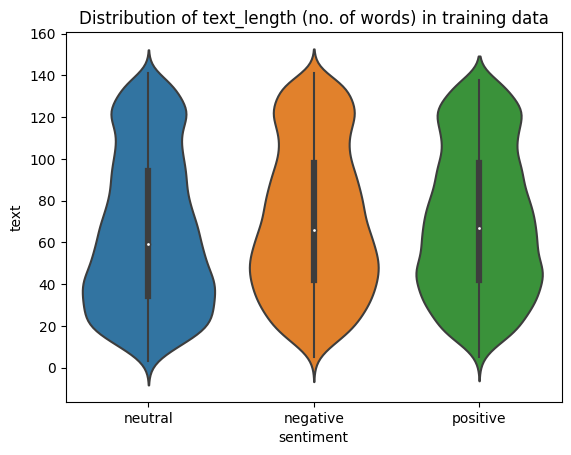

In [7]:
text_length = train_df['text'].apply(lambda x: len(str(x)))
# Create a violin plot of text length by sentiment
sb.violinplot(data=train_df, y=text_length, x='sentiment').set_title('Distribution of text_length (no. of words) in training data')

## Clean the data
- remove rows or columns that contain null
- remove duplicate rows from a DataFrame

In [10]:
train_df.dropna(axis=0, how="any", inplace=True)
train_df.drop_duplicates(keep="first")

,textID,text,selected_text,sentiment
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative
2,088c60f138,my boss is bullying me...,bullying me,negative
3,9642c003ef,what interview! leave me alone,leave me alone,negative
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative
...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive


In [11]:
train_df['text'] = train_df['text'].progress_apply(lambda x : str(x).lower())

AttributeError: 'Series' object has no attribute 'progress_apply'